In [68]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [69]:
df = pd.read_csv('/content/Company_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [70]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<Axes: xlabel='Population', ylabel='Count'>

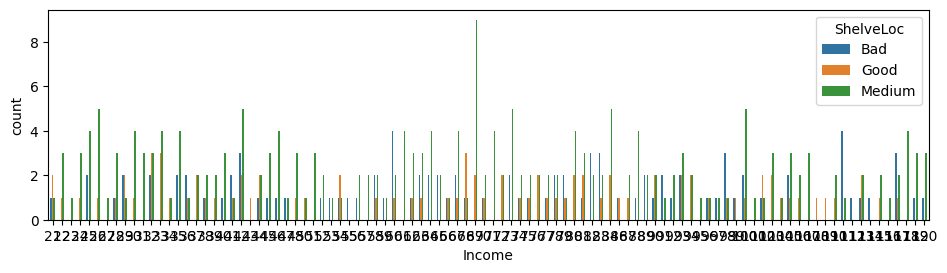

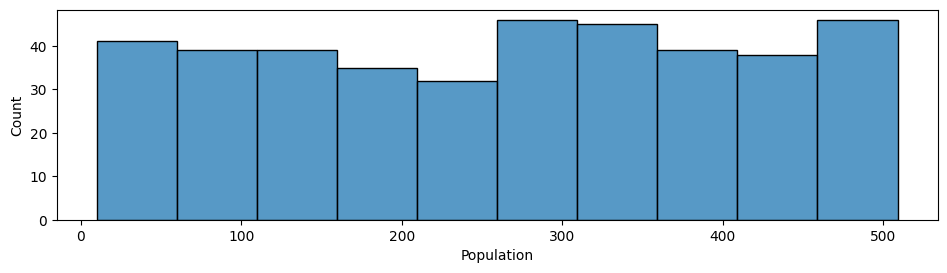

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,6))
plt.subplot (221)
sns.countplot(data=df, x='Income', hue='ShelveLoc', width =0.5)
plt.figure(figsize=(25,6))
plt.subplot (222)
sns.histplot(data=df, x='Population')

<Axes: xlabel='Sales', ylabel='Count'>

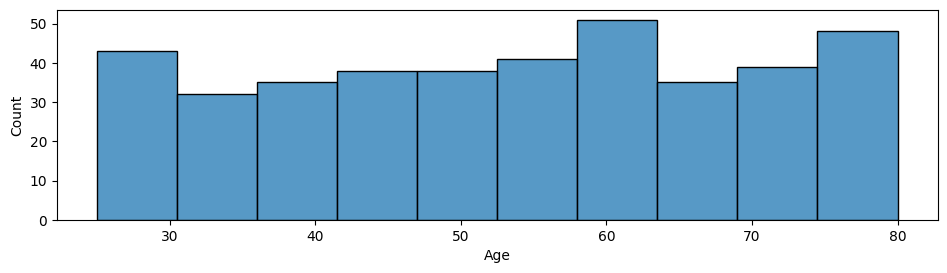

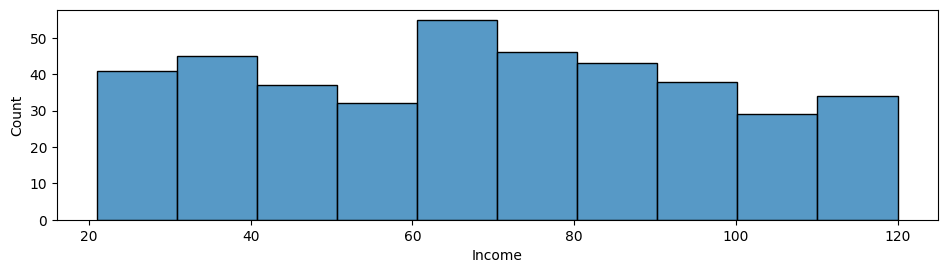

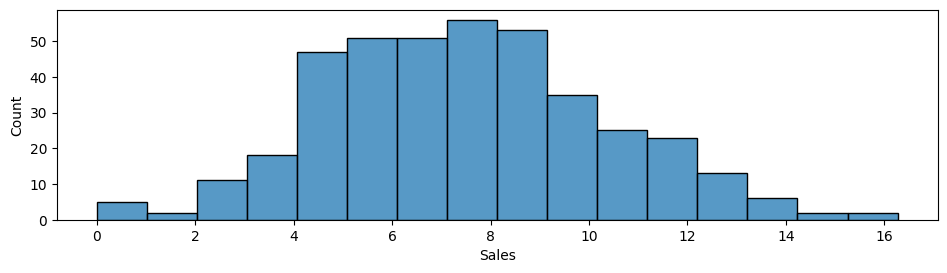

In [72]:
plt.figure(figsize=(25,6))
plt.subplot (221)
sns.histplot(data=df, x='Age')
plt.figure(figsize=(25,6))
plt.subplot (222)
sns.histplot(data=df, x='Income')
plt.figure(figsize=(25,6))
plt.subplot (223)
sns.histplot(data=df, x='Sales')

In [73]:
print(df['Sales'].min())
print(df['Sales'].mean())
print(df['Sales'].max())

0.0
7.496325000000001
16.27


In [74]:
#converting Sales Contineous data into Sales categorial data

df['Ssales'] = pd.cut(x=df['Sales'], bins=[ 0,5,10,20],labels=['Bad_Sales','Ok_Sales','Good_Sales'])

# dropping Sales column
df.drop('Sales', axis=1, inplace=True)

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Ssales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Ok_Sales
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good_Sales
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good_Sales
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Ok_Sales
4,141,64,3,340,128,Bad,38,13,Yes,No,Bad_Sales


In [75]:
df['Ssales'].unique()

['Ok_Sales', 'Good_Sales', 'Bad_Sales', NaN]
Categories (3, object): ['Bad_Sales' < 'Ok_Sales' < 'Good_Sales']

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])
df['Urban']=le.fit_transform(df['Urban'])
df['US']=le.fit_transform(df['US'])
df['Ssales']=le.fit_transform(df['Ssales'])

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Ssales
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,0


In [78]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Ssales
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,1.427500
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.794558
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,1.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,2.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,2.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,3.000000


In [79]:
#satandardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(df.iloc[:,:-1])

In [80]:
y = df.iloc[:,-1]

In [81]:
# Picking LogisticRegression as base model

from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()

In [82]:
# fitting base model in BaggingClassifier

from sklearn.ensemble import BaggingClassifier
model1 = BaggingClassifier(base_estimator= m1, n_estimators=50,random_state=5)

In [83]:
# cross_val_score

from sklearn.model_selection import cross_val_score
score1 = cross_val_score(model1, x, y, cv = 10)

score1

array([0.625, 0.725, 0.65 , 0.725, 0.75 , 0.725, 0.675, 0.625, 0.675,
       0.75 ])

In [84]:
score1.mean()

0.6925

In [85]:
# Boosting - AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators= 50,random_state=5)

In [86]:
score2 = cross_val_score(ad, x,y,cv=10)

In [87]:
score2.mean()

0.5725000000000001

In [88]:
# Bagging - RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = "entropy",n_estimators=50,max_features=3)

In [89]:
# cross_val_score


score3 = cross_val_score(rf,x,y,cv = 10)

score3

array([0.675, 0.65 , 0.775, 0.725, 0.825, 0.75 , 0.725, 0.65 , 0.65 ,
       0.625])

In [90]:
score3.mean()

0.7050000000000001

Random forest(uses decision tree as base model) give batter accuracy than Adaboost and logisticregression model

In [91]:
data={'Method':['BaggingClassifier','AdaBoostClassifier','RandomForestClassifier'],'Accuracy':[score1.mean(),score2.mean(),score3.mean()]}

Acc = pd.DataFrame(data)
Acc.sort_values('Accuracy')

,Method,Accuracy
1,AdaBoostClassifier,0.5725
0,BaggingClassifier,0.6925
2,RandomForestClassifier,0.7050


<Axes: xlabel='Method', ylabel='Accuracy'>

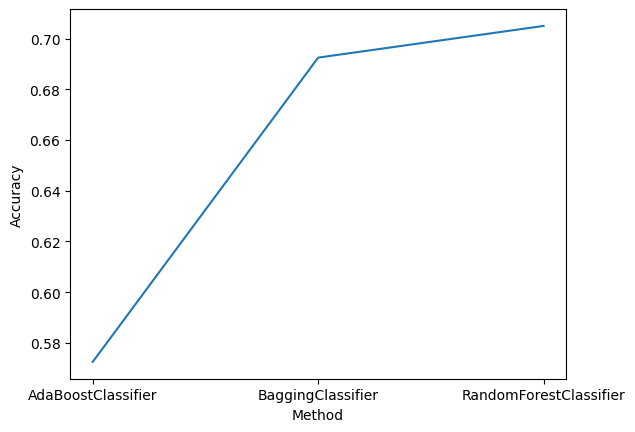

In [92]:
import seaborn as sns
sns.lineplot(data=Acc.sort_values('Accuracy'), x="Method", y="Accuracy")

#Fraud Check

In [93]:
df2 = pd.read_csv('/content/Fraud_check.csv')
df2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<Axes: xlabel='Taxable.Income', ylabel='Count'>

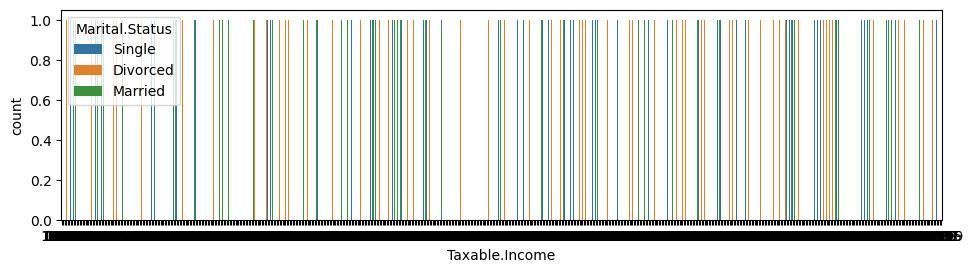

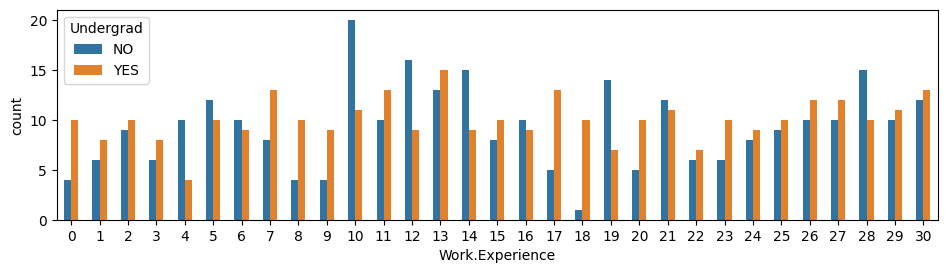

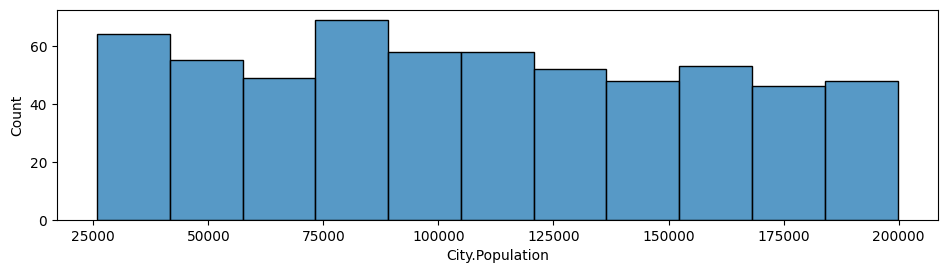

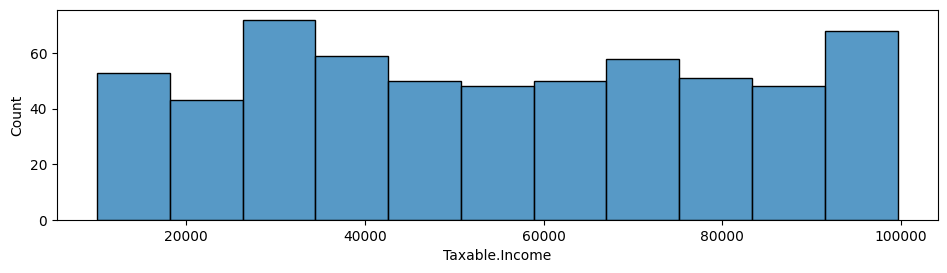

In [95]:
plt.figure(figsize=(25,6))
plt.subplot (221)
sns.countplot(data=df2, x='Taxable.Income', hue='Marital.Status', width =0.5)
plt.figure(figsize=(25,6))
plt.subplot (222)
sns.countplot(data=df2, x='Work.Experience', hue='Undergrad', width =0.5)
plt.figure(figsize=(25,6))
plt.subplot (223)
sns.histplot(data=df2, x='City.Population')
plt.figure(figsize=(25,6))
plt.subplot (224)
sns.histplot(data=df2, x='Taxable.Income')

In [117]:
df2['Undergrad'] = le.fit_transform(df2['Undergrad'])
df2['Marital.Status'] = le.fit_transform(df2['Marital.Status'])
df2['Urban'] = le.fit_transform(df2['Urban'])

df2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [135]:
fraud_check = pd.read_csv('/content/Fraud_check.csv')
fraud_check.drop('Taxable.Income',axis=1, inplace =True)
fraud_check = pd.get_dummies(fraud_check.iloc[:,:-1])
fraud_check.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,50047,10,1,0,0,0,1
1,134075,18,0,1,1,0,0
2,160205,30,1,0,0,1,0
3,193264,15,0,1,0,0,1
4,27533,28,1,0,0,1,0


In [137]:
#seperate dependent and independent fectures

#satandardization
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

fraud_check.iloc[:,0:2] = sc.fit_transform(fraud_check.iloc[:,0:2] )
fraud_check.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,-1.178521,-0.629143,1,0,0,0,1
1,0.508500,0.276370,0,1,1,0,0
2,1.033109,1.634639,1,0,0,1,0
3,1.696831,-0.063197,0,1,0,0,1
4,-1.630532,1.408261,1,0,0,1,0


In [138]:
x1= fraud_check.iloc[:,:]
y1= df2['Taxable.Income'].apply(lambda X: "Risky" if X <= 30000 else "Good")

In [139]:
print(x1.shape, y1.shape)

(600, 7) (600,)


In [140]:
# Boosting - AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
ad2 = AdaBoostClassifier(n_estimators= 50,random_state=5)

In [141]:
scoreA = cross_val_score(ad2, x1,y1,cv=5)
scoreA

array([0.79166667, 0.78333333, 0.79166667, 0.78333333, 0.78333333])

In [142]:
scoreA.mean()

0.7866666666666666

In [143]:
# Bagging - RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = "entropy",n_estimators=50,max_features=3)

In [144]:
# cross_val_score


scoreB = cross_val_score(rf,x1,y1,cv = 5)

scoreB

array([0.74166667, 0.71666667, 0.725     , 0.725     , 0.69166667])

In [145]:
scoreB.mean()

0.7200000000000001

In [146]:
data1={'Method':['AdaBoostClassifier','RandomForestClassifier'],'Accuracy':[scoreA.mean(),scoreB.mean()]}

Acc = pd.DataFrame(data1)
Acc.sort_values('Accuracy')

,Method,Accuracy
1,RandomForestClassifier,0.720000
0,AdaBoostClassifier,0.786667
